In [1]:
from PIL import Image, ImageFilter, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_and_display_image(file_path):
    try:
        image = Image.open(file_path)
        image.show()
        return image
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

In [3]:
def apply_filter(image, filter_type):
    if filter_type == "blur":
        return image.filter(ImageFilter.GaussianBlur(radius=5))
    elif filter_type == "edge":
        return image.filter(ImageFilter.FIND_EDGES)
    else:
        print("Unknown filter type")
        return image

In [4]:
def adjust_brightness_contrast(image, brightness_factor=1.0, contrast_factor=1.0):
    enhancer_brightness = ImageEnhance.Brightness(image)
    image = enhancer_brightness.enhance(brightness_factor)
    enhancer_contrast = ImageEnhance.Contrast(image)
    return enhancer_contrast.enhance(contrast_factor)

In [5]:
def resize_image(image, width, height):
    return image.resize((width, height))

In [6]:
def convert_to_grayscale(image):
    return image.convert("L")

In [7]:
def display_histogram(image):
    image_np = np.array(image)
    
    if image.mode == 'RGB':
        color = ('red', 'green', 'blue')
        for i, col in enumerate(color):
            plt.hist(image_np[:, :, i].ravel(), bins=256, color=col, alpha=0.5)
    else: 
        plt.hist(image_np.ravel(), bins=256, color='black')
    
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.title("Image Histogram")
    plt.show()


Options:
1. Apply Filter (blur, edge)
2. Adjust Brightness/Contrast
3. Resize Image
4. Convert to Grayscale
5. Display Histogram
6. Quit


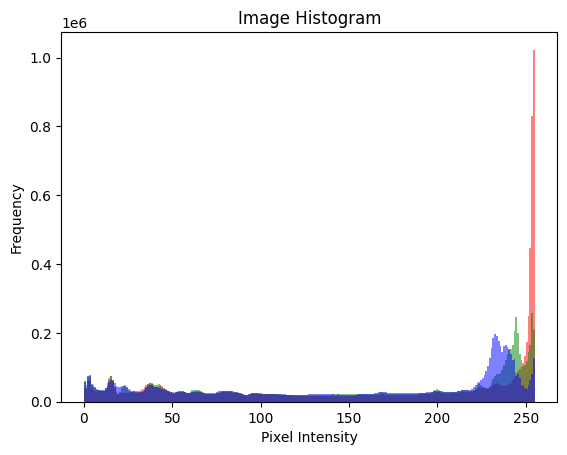


Options:
1. Apply Filter (blur, edge)
2. Adjust Brightness/Contrast
3. Resize Image
4. Convert to Grayscale
5. Display Histogram
6. Quit
Exiting.


In [16]:
def main():
    file_path = input("Enter the path of the image: ")
    image = load_and_display_image(file_path)
    
    if not image:
        print("Could not load image. Exiting.")
        return
    
    while True:
        print("\nOptions:")
        print("1. Apply Filter (blur, edge)")
        print("2. Adjust Brightness/Contrast")
        print("3. Resize Image")
        print("4. Convert to Grayscale")
        print("5. Display Histogram")
        print("6. Quit")
        
        choice = input("Enter choice: ")
        
        if choice == '1':
            filter_type = input("Enter filter type (blur, edge): ")
            image = apply_filter(image, filter_type)
            image.show()
        
        elif choice == '2':
            brightness = float(input("Enter brightness factor (default 1.0): "))
            contrast = float(input("Enter contrast factor (default 1.0): "))
            image = adjust_brightness_contrast(image, brightness, contrast)
            image.show()
        
        elif choice == '3':
            width = int(input("Enter new width: "))
            height = int(input("Enter new height: "))
            image = resize_image(image, width, height)
            image.show()
        
        elif choice == '4':
            image = convert_to_grayscale(image)
            image.show()
        
        elif choice == '5':
            display_histogram(image)
        
        elif choice == '6':
            print("Exiting.")
            break
        
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()
